In [4]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install wordcloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
import string
import re
from textblob import TextBlob
from wordcloud import WordCloud
!pip install contractions

import contractions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df = pd.read_excel('ChristUni.xlsx')

In [14]:
df.head()

,review,Sentiment
0,The rules at Christ University are too strict.,Bad
1,The placement opportunities are really good.,Good
2,Some teachers lack enthusiasm in teaching.,Bad
3,The rules at Christ University are too strict.,Bad
4,Not enough freedom for students.,Bad


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     100 non-null    object
 1   Sentiment  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [18]:
df['review']

0        The rules at Christ University are too strict.
1          The placement opportunities are really good.
2            Some teachers lack enthusiasm in teaching.
3        The rules at Christ University are too strict.
4                      Not enough freedom for students.
                            ...                        
95      A great place to learn and grow professionally.
96    Christ has a well-structured curriculum and re...
97    The university maintains a disciplined and foc...
98          Campus life is vibrant with lots of events.
99                    Too many dress code restrictions.
Name: review, Length: 100, dtype: object

In [20]:
df.isnull().sum()

review       0
Sentiment    0
dtype: int64

In [22]:
df= df.dropna()
df.isnull().sum()

review       0
Sentiment    0
dtype: int64

In [23]:
df.duplicated().sum()

80

In [24]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 63
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     20 non-null     object
 1   Sentiment  20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


In [26]:
df['Sentiment'].value_counts()

Sentiment
Bad     10
Good    10
Name: count, dtype: int64

In [27]:
#NLP

In [28]:
#lowercase
df['review']= df['review'].str.lower()
df['review'].head()

0    the rules at christ university are too strict.
1      the placement opportunities are really good.
2        some teachers lack enthusiasm in teaching.
4                  not enough freedom for students.
5     student support services are very responsive.
Name: review, dtype: object

In [29]:
#expanding abrrivieations
def remove_abb(data):
     data = re.sub(r"he's", "he is", data)
     data = re.sub(r"there's", "there is", data)
     data = re.sub(r"We're", "We are", data)
     data = re.sub(r"That's", "That is", data)
     data = re.sub(r"won't", "will not", data)
     data = re.sub(r"they're", "they are", data)
     data = re.sub(r"Can't", "Cannot", data)
     data = re.sub(r"wasn't", "was not", data)
     data = re.sub(r"don\x89Ûªt", "do not", data)
     data= re.sub(r"aren't", "are not", data)
     data = re.sub(r"isn't", "is not", data)
     data = re.sub(r"What's", "What is", data)
     data = re.sub(r"haven't", "have not", data)
     data = re.sub(r"hasn't", "has not", data)
     data = re.sub(r"There's", "There is", data)
     data = re.sub(r"He's", "He is", data)
     data = re.sub(r"It's", "It is", data)
     data = re.sub(r"You're", "You are", data)
     data = re.sub(r"I'M", "I am", data)
     data = re.sub(r"shouldn't", "should not", data)
     data = re.sub(r"wouldn't", "would not", data)
     data = re.sub(r"i'm", "I am", data)
     data = re.sub(r"I\x89Ûªm", "I am", data)
     data = re.sub(r"I'm", "I am", data)
     data = re.sub(r"Isn't", "is not", data)
     data = re.sub(r"Here's", "Here is", data)
     data = re.sub(r"you've", "you have", data)
     data = re.sub(r"you\x89Ûªve", "you have", data)
     data = re.sub(r"we're", "we are", data)
     data = re.sub(r"what's", "what is", data)
     data = re.sub(r"couldn't", "could not", data)
     data = re.sub(r"we've", "we have", data)
     data = re.sub(r"it\x89Ûªs", "it is", data)
     data = re.sub(r"doesn\x89Ûªt", "does not", data)
     data = re.sub(r"It\x89Ûªs", "It is", data)
     data = re.sub(r"Here\x89Ûªs", "Here is", data)
     data = re.sub(r"who's", "who is", data)
     data = re.sub(r"I\x89Ûªve", "I have", data)
     data = re.sub(r"y'all", "you all", data)
     data = re.sub(r"can\x89Ûªt", "cannot", data)
     data = re.sub(r"would've", "would have", data)
     data = re.sub(r"it'll", "it will", data)
     data = re.sub(r"we'll", "we will", data)
     data = re.sub(r"wouldn\x89Ûªt", "would not", data)
     data = re.sub(r"We've", "We have", data)
     data = re.sub(r"he'll", "he will", data)
     data = re.sub(r"Y'all", "You all", data)
     data = re.sub(r"Weren't", "Were not", data)
     data = re.sub(r"Didn't", "Did not", data)
     data = re.sub(r"they'll", "they will", data)
     data = re.sub(r"they'd", "they would", data)
     data = re.sub(r"DON'T", "DO NOT", data)
     data = re.sub(r"That\x89Ûªs", "That is", data)
     data = re.sub(r"they've", "they have", data)
     data = re.sub(r"i'd", "I would", data)
     data = re.sub(r"should've", "should have", data)
     data = re.sub(r"You\x89Ûªre", "You are", data)
     data = re.sub(r"where's", "where is", data)
     data = re.sub(r"Don\x89Ûªt", "Do not", data)
     data = re.sub(r"we'd", "we would", data)
     data = re.sub(r"i'll", "I will", data)
     data = re.sub(r"weren't", "were not", data)
     data = re.sub(r"They're", "They are", data)
     data = re.sub(r"Can\x89Ûªt", "Cannot", data)
     data = re.sub(r"you\x89Ûªll", "you will", data)
     data = re.sub(r"I\x89Ûªd", "I would", data)
     data = re.sub(r"let's", "let us", data)
     data = re.sub(r"it's", "it is", data)
     data = re.sub(r"can't", "cannot", data)
     data = re.sub(r"don't", "do not", data)
     data = re.sub(r"you're", "you are", data)
     data = re.sub(r"i've", "I have", data)
     data = re.sub(r"that's", "that is", data)
     data = re.sub(r"i'll", "I will", data)
     data = re.sub(r"doesn't", "does not",data)
     data = re.sub(r"i'd", "I would", data)
     data = re.sub(r"didn't", "did not", data)
     data = re.sub(r"ain't", "am not", data)
     data = re.sub(r"you'll", "you will", data)
     data = re.sub(r"I've", "I have", data)
     data = re.sub(r"Don't", "do not", data)
     data = re.sub(r"I'll", "I will", data)
     data = re.sub(r"I'd", "I would", data)
     data = re.sub(r"Let's", "Let us", data)
     data = re.sub(r"you'd", "You would", data)
     data = re.sub(r"It's", "It is", data)
     data = re.sub(r"Ain't", "am not", data)
     data = re.sub(r"Haven't", "Have not", data)
     data = re.sub(r"Could've", "Could have", data)
     data = re.sub(r"youve", "you have", data)
     data = re.sub(r"donå«t", "do not", data)
     return data

df['review']= df['review'].apply(remove_abb)
df['review']


0        the rules at christ university are too strict.
1          the placement opportunities are really good.
2            some teachers lack enthusiasm in teaching.
4                      not enough freedom for students.
5         student support services are very responsive.
6        faculty members are knowledgeable and helpful.
8       a great place to learn and grow professionally.
9                    attendance policy is overly rigid.
11    christ has a well-structured curriculum and re...
14    extracurricular activities are strongly encour...
15          campus life is vibrant with lots of events.
18    the infrastructure is top-notch and well-maint...
25    christ university offers excellent academic fa...
26          limited practical exposure in some courses.
39    some facilities are outdated or under-maintained.
42                    too many dress code restrictions.
47          bias in faculty behavior has been reported.
48    the university maintains a disciplined and

In [30]:
#spelling mistakes correct

def spell_correct(text):
    return TextBlob(str(text)).correct().string

df['review'].apply(spell_correct)
df['review'].head()

0    the rules at christ university are too strict.
1      the placement opportunities are really good.
2        some teachers lack enthusiasm in teaching.
4                  not enough freedom for students.
5     student support services are very responsive.
Name: review, dtype: object

In [31]:
#removing punctuation

def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
    return text 

df['review'] = df['review'].apply(remove_punctuation)

df['review'].head()

0    the rules at christ university are too strict
1      the placement opportunities are really good
2        some teachers lack enthusiasm in teaching
4                  not enough freedom for students
5     student support services are very responsive
Name: review, dtype: object

In [32]:
#tokenization
df['tokenized_review'] = df['review'].apply(word_tokenize)
df['tokenized_review'].head()

0    [the, rules, at, christ, university, are, too,...
1    [the, placement, opportunities, are, really, g...
2     [some, teachers, lack, enthusiasm, in, teaching]
4                [not, enough, freedom, for, students]
5    [student, support, services, are, very, respon...
Name: tokenized_review, dtype: object

In [33]:
#stop words removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text if word.lower() not in stop_words]
    return filtered_words

df['tokenized_review']=df['tokenized_review'].apply(remove_stopwords)

df['tokenized_review'].head()

0         [rules, christ, university, strict]
1    [placement, opportunities, really, good]
2      [teachers, lack, enthusiasm, teaching]
4                 [enough, freedom, students]
5    [student, support, services, responsive]
Name: tokenized_review, dtype: object

In [34]:
#stemming

stemmer = PorterStemmer()
df['review'] = df['tokenized_review'].apply(lambda words: [stemmer.stem(word) for word in words])
df['review'].head()

0        [rule, christ, univers, strict]
1    [placement, opportun, realli, good]
2     [teacher, lack, enthusiasm, teach]
4             [enough, freedom, student]
5    [student, support, servic, respons]
Name: review, dtype: object

In [35]:
#lemmatization

lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda words: [lemmatizer.lemmatize(word, pos='v') for word in words])
df['review'].head()

0        [rule, christ, univers, strict]
1    [placement, opportun, realli, good]
2     [teacher, lack, enthusiasm, teach]
4             [enough, freedom, student]
5    [student, support, servic, respons]
Name: review, dtype: object

In [36]:
#remove extra white spaces
#df['review'] = df['review'].apply(lambda x: ' '.join(x[0].split()) if isinstance(x, list) and len(x) > 0 else x)

df['review'].head()

0        [rule, christ, univers, strict]
1    [placement, opportun, realli, good]
2     [teacher, lack, enthusiasm, teach]
4             [enough, freedom, student]
5    [student, support, servic, respons]
Name: review, dtype: object

In [37]:
#handling abbrivieations


df['review'] = df['review'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)
df['review'].head()

0        [rule, christ, univers, strict]
1    [placement, opportun, realli, good]
2     [teacher, lack, enthusiasm, teach]
4             [enough, freedom, student]
5    [student, support, servic, respons]
Name: review, dtype: object

In [38]:
#review<--tokenized review
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))
df['review'].head()

0         rules christ university strict
1    placement opportunities really good
2      teachers lack enthusiasm teaching
4                enough freedom students
5    student support services responsive
Name: review, dtype: object

In [39]:
df['char_length'] = df['review'].str.len()
df.head()

,review,Sentiment,tokenized_review,char_length
0,rules christ university strict,Bad,"[rules, christ, university, strict]",30
1,placement opportunities really good,Good,"[placement, opportunities, really, good]",35
2,teachers lack enthusiasm teaching,Bad,"[teachers, lack, enthusiasm, teaching]",33
4,enough freedom students,Bad,"[enough, freedom, students]",23
5,student support services responsive,Good,"[student, support, services, responsive]",35


In [40]:
#Data Analysis

In [41]:
df['tokenized_review'].sum()

['rules',
 'christ',
 'university',
 'strict',
 'placement',
 'opportunities',
 'really',
 'good',
 'teachers',
 'lack',
 'enthusiasm',
 'teaching',
 'enough',
 'freedom',
 'students',
 'student',
 'support',
 'services',
 'responsive',
 'faculty',
 'members',
 'knowledgeable',
 'helpful',
 'great',
 'place',
 'learn',
 'grow',
 'professionally',
 'attendance',
 'policy',
 'overly',
 'rigid',
 'christ',
 'wellstructured',
 'curriculum',
 'regular',
 'industry',
 'exposure',
 'extracurricular',
 'activities',
 'strongly',
 'encouraged',
 'campus',
 'life',
 'vibrant',
 'lots',
 'events',
 'infrastructure',
 'topnotch',
 'wellmaintained',
 'christ',
 'university',
 'offers',
 'excellent',
 'academic',
 'facilities',
 'limited',
 'practical',
 'exposure',
 'courses',
 'facilities',
 'outdated',
 'undermaintained',
 'many',
 'dress',
 'code',
 'restrictions',
 'bias',
 'faculty',
 'behavior',
 'reported',
 'university',
 'maintains',
 'disciplined',
 'focused',
 'environment',
 'management

In [42]:
pd.Series(ngrams(df['review'].sum(),2)).value_counts()

(s,  )    15
(e, s)    14
(r, e)    13
(e, n)    13
(a, c)    13
          ..
(o, l)     1
(t, t)     1
(y, a)     1
(w,  )     1
(p, e)     1
Name: count, Length: 234, dtype: int64

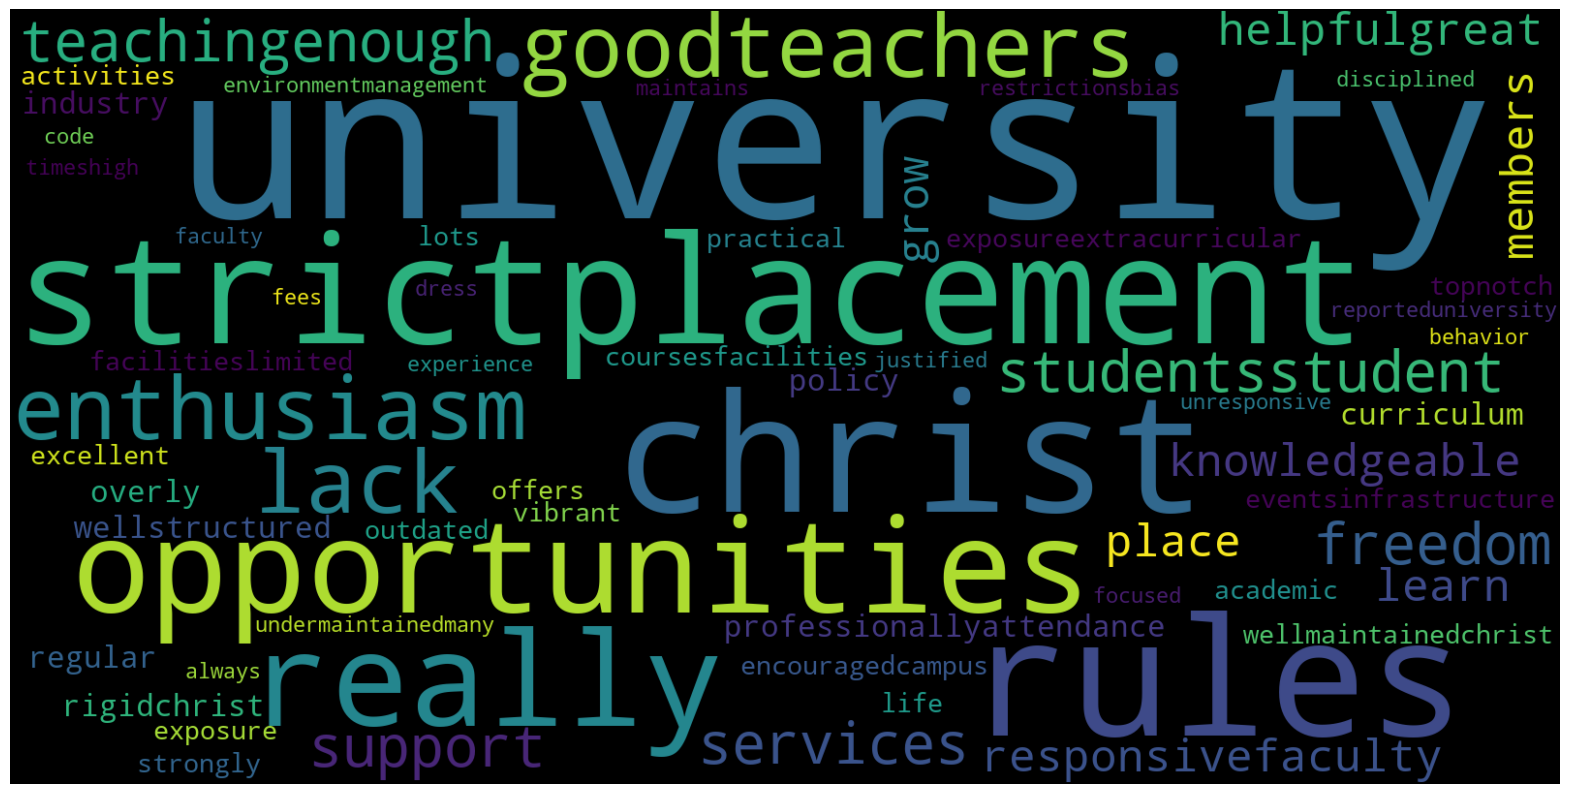

In [43]:
plt.figure(figsize=(20,20))
wc = WordCloud(width=1600, height=800).generate("".join(df['review']))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()